In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import scipy.stats as stats

### A. Import dataset

In [2]:
df = pd.read_csv('SLR_Practice.csv',index_col='No')
df.tail(6).round(2)

,X,Y
No,,
295,295,199.89
296,296,200.56
297,297,201.22
298,298,201.89
299,299,1.89
300,300,1.89


In [3]:
df.columns.tolist()

['X', 'Y']

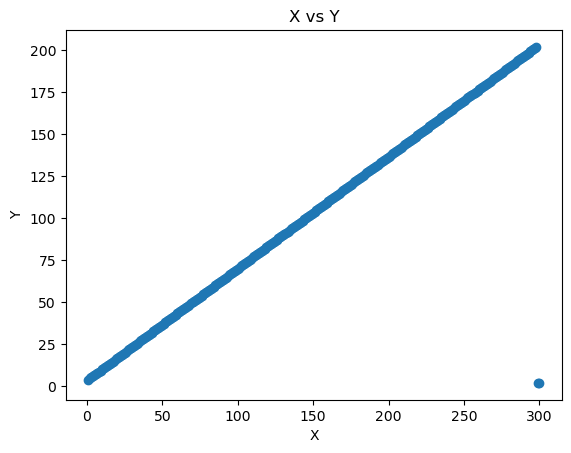

In [4]:
# Scatter plot Price vs Size

plt.scatter(df['X'],df['Y'])
plt.title('X vs Y')
plt.ylabel('Y')
plt.xlabel('X')

plt.show()

### B. Check Data Quality and Data Treatment (if necessary)

In [5]:
# Check missing values
df.isnull().sum()

X    0
Y    0
dtype: int64

In [6]:
# Check duplicated rows
df[df.duplicated(keep=False)]

,X,Y
No,,


### C. Exploratory Data Analysis

In [7]:
df.describe().round(2)

,X,Y
count,300.00,300.00
mean,150.50,102.22
std,86.75,57.84
min,1.00,1.89
25%,75.75,52.39
50%,150.50,102.22
75%,225.25,152.06
max,300.00,201.89


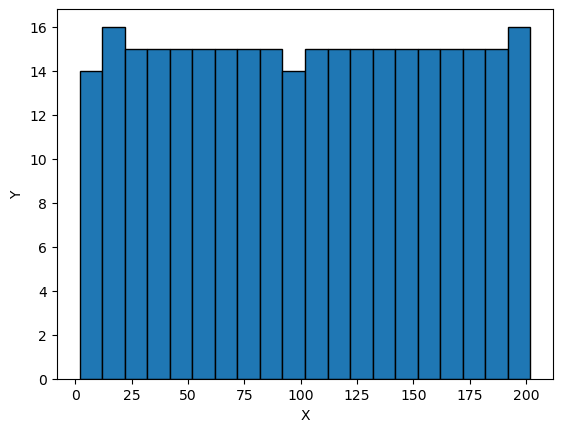

In [8]:
plt.hist(df['Y'],bins=20,edgecolor='black')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

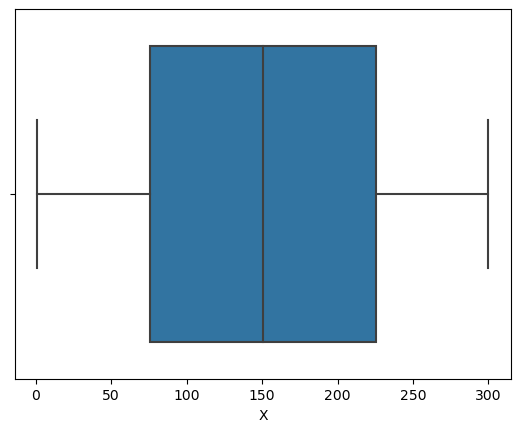

In [9]:
#Create boxplot to check for outliers
sns.boxplot(x='X',data=df)
plt.show()

## D. Feature Selections

In [10]:
df.head()

,X,Y
No,,
1,1,3.888889
2,2,4.555556
3,3,5.222222
4,4,5.888889
5,5,6.555556


In [11]:
#To check the correlation value.
df.corr(numeric_only=True)

,X,Y
X,1.000000,0.959876
Y,0.959876,1.000000


## E. Assign Input and Output Variable

In [12]:
df.columns.tolist()

['X', 'Y']

In [13]:
# Rearrange the table 
df = df[['X','Y']]
df.head()

,X,Y
No,,
1,1,3.888889
2,2,4.555556
3,3,5.222222
4,4,5.888889
5,5,6.555556


In [14]:
# Rearrange the table (iloc [row,column]) and assign the input and output
x = df.iloc[:,:-1] #input
y = df.iloc[:,-1] #output

In [15]:
x.head(5)

,X
No,
1,1
2,2
3,3
4,4
5,5


In [16]:
y.head(5)

No
1    3.888889
2    4.555556
3    5.222222
4    5.888889
5    6.555556
Name: Y, dtype: float64

In [17]:
df.shape

(300, 2)

## F. Dataset Partitioning

In [18]:
# Partitioning

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split (x,y,test_size=0.2,random_state=0)

In [19]:
x_train.head(5)

,X
No,
135,135
146,146
64,64
294,294
286,286


In [20]:
y_train.head()

No
135     93.222222
146    100.555556
64      45.888889
294    199.222222
286    193.888889
Name: Y, dtype: float64

## G. Algorithm Training using Train Set 

In [21]:
# Add constant to the x train set
import statsmodels.api as sm
x_train = sm.add_constant(x_train)

In [22]:
x_train.head(5)

,const,X
No,,
135,1.0,135
146,1.0,146
64,1.0,64
294,1.0,294
286,1.0,286


In [23]:
# Train the algorithm from the train sets
reg_model = sm.OLS(y_train,x_train).fit()

In [24]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     4594.
Date:                Sat, 20 Jan 2024   Prob (F-statistic):          1.32e-157
Time:                        19:49:29   Log-Likelihood:                -953.29
No. Observations:                 240   AIC:                             1911.
Df Residuals:                     238   BIC:                             1918.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8658      1.670      2.914      0.004       1.576       8.155
X              0.6502      0.010     67.782      0.000       0.631       0.669
==============================================================================
Omnibus:                      536.472   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           534650.744
Skew:                         -15.112   Prob(JB):                         0.00
Kurtosis:                     232.241   Cond. No.                         349.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### G(a). Model Evaluation – Method 1: R-Squared Value



Since the model is a simple linear regression which only consist of 1 independent variable (X) and 1 dependant variable (Y),the formula is Y = mX + C.
Therefore, the predictive model (reg_model) will be as below:
- Y = mX + C
- Y =  (217.67 * X) + 4.8658

### G(b). Model Evaluation – Method 2: Predicted vs Actual

- To check how well our model is when compared to the actual data

In [25]:
# Prepare the test model
# Add constant to the test model
x_test = sm.add_constant(x_test)

In [26]:
x_test.head(5)

,const,X
No,,
209,1.0,209
189,1.0,189
13,1.0,13
222,1.0,222
240,1.0,240


In [27]:
# Apply y-prediction model with the test set, using reg_model (to predict the output)
y_pred = reg_model.predict(x_test)

In [28]:
y_pred.round(2).head(5) # Predicted

No
209    140.76
189    127.76
13      13.32
222    149.22
240    160.92
dtype: float64

In [29]:
y_test.head(5) # Actual

No
209    142.555556
189    129.222222
13      11.888889
222    151.222222
240    163.222222
Name: Y, dtype: float64

In [30]:
# Create new dataframe which consisted of Predicted Output and Actual Output for Test set
df_validate = pd.DataFrame({'X':x_test['X'],'Actual':y_test,'Predicted':y_pred}) #Create Data Frame
df_validate['Predicted']=df_validate['Predicted'].round(2)
df_validate=df_validate.set_index('X')
df_validate.head(10)

,Actual,Predicted
X,,
209,142.555556,140.76
189,129.222222,127.76
13,11.888889,13.32
222,151.222222,149.22
240,163.222222,160.92
137,94.555556,93.95
231,157.222222,155.07
207,141.222222,139.46
53,38.555556,39.33


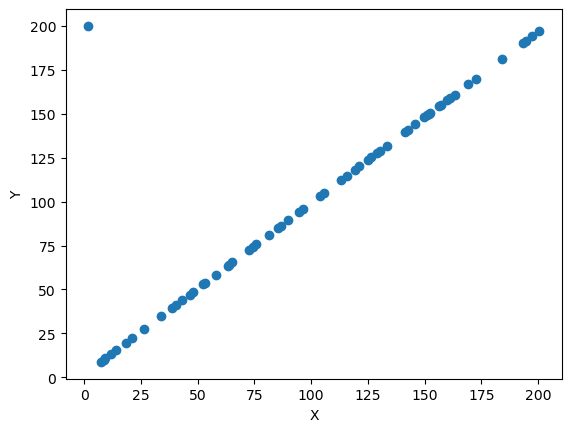

In [31]:
# Compare by creating scatter plot
plt.scatter(df_validate['Actual'],df_validate['Predicted'])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [32]:
# Check the correlation
df_validate.corr().round(3)

,Actual,Predicted
Actual,1.000,0.898
Predicted,0.898,1.000


In [33]:
# Data to plot the graph

x_graph = sm.add_constant(df['X'])
y_graph = reg_model.predict(x_graph).round(2)

table_graph = pd.DataFrame({'x':df['X'],'y':y_graph})
table_graph.head()

,x,y
No,,
1,1,5.52
2,2,6.17
3,3,6.82
4,4,7.47
5,5,8.12


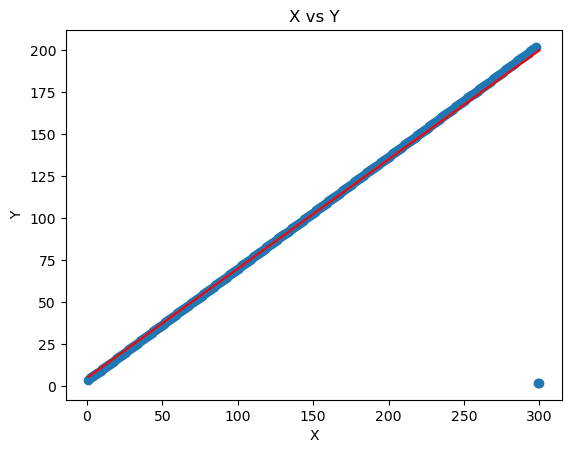

In [34]:
# Combine the model with the scatter plot
plt.scatter(df['X'],df['Y'])
plt.plot(table_graph['x'],table_graph['y'],color='red')
plt.title('X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [35]:
# Predict the price if size is 700 and 800

df_input = pd.DataFrame({'X':[150,222]})
df_input = sm.add_constant(df_input)

# Perform the prediction
pred_price = reg_model.predict(df_input).round(2)

# Summary of Results
df_predict = pd.DataFrame({'X':[900,1020],'Projected Y':pred_price})

In [36]:
df_predict

,X,Projected Y
0,900,102.40
1,1020,149.22
